In [ ]:
# Gender Gap Study
# Diaz Eaton, DCS 105A: Calling Bull
# Gender Gap Case Study,  November 12, 2023
# Jamil Mouehla

In [ ]:
times<-read.csv("Data for Gender Gap Projects - Sheet1.csv")

In [ ]:
times

Year,Men.s.Times,Women.s.Times
<int>,<dbl>,<dbl>
1900,11.00,NA
1904,11.00,NA
1908,10.80,NA
1912,10.80,NA
1916,NA,NA
1920,10.80,NA
1924,10.60,NA
1928,10.80,12.20
1932,10.30,11.90


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


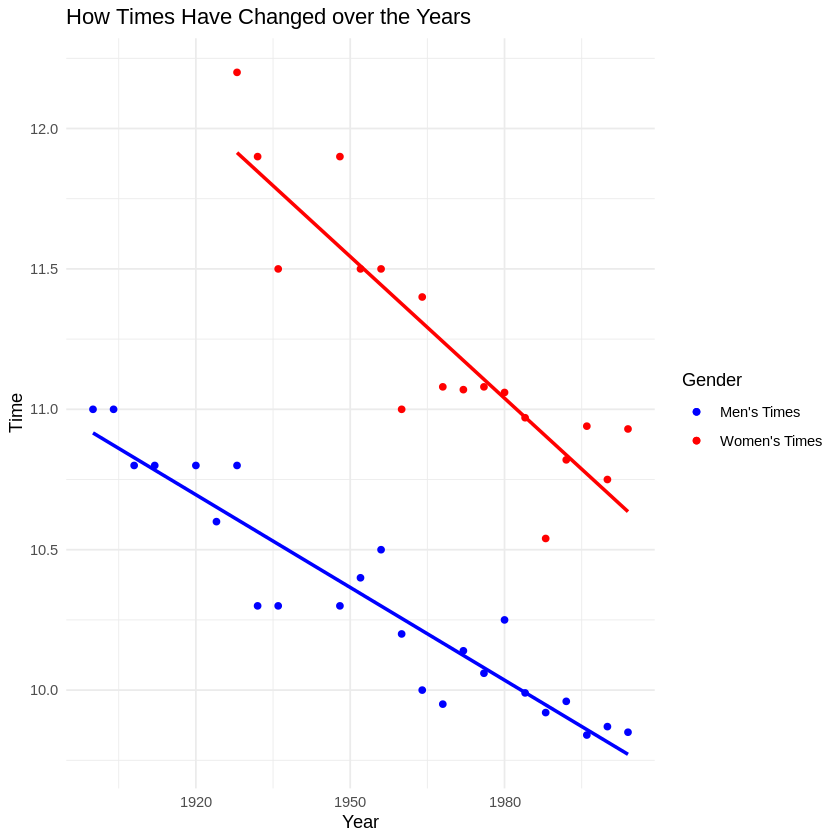

In [ ]:
# Load the ggplot2 library
library(ggplot2)

# Scatterplot with regression line to show the correlation
ggplot(times, aes(x = Year, y = Men.s.Times)) +
  geom_point(aes(color = "Men's Times")) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_point(aes(y = Women.s.Times, color = "Women's Times")) +
  geom_smooth(aes(y = Women.s.Times), method = "lm", se = FALSE, color = "red") +
  labs(
    title = "How Times Have Changed over the Years",
    x = "Year",
    y = "Time",
    color = "Gender"
  ) +
  scale_color_manual(values = c("Men's Times" = "blue", "Women's Times" = "red")) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


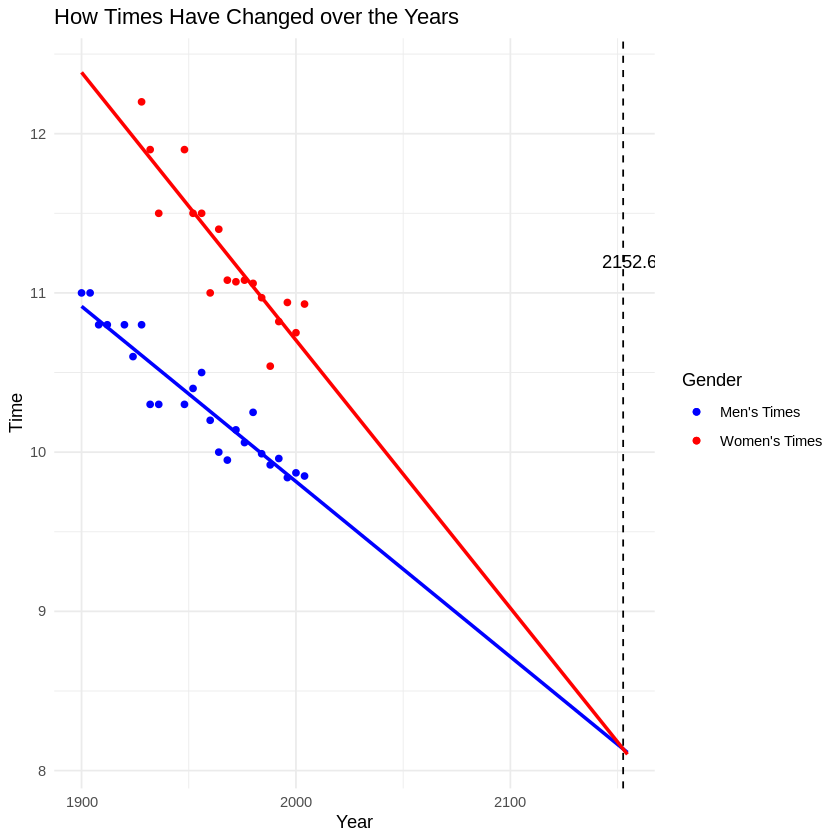

In [ ]:
library(ggplot2)

plot <- ggplot(times, aes(x = Year)) +
  geom_point(aes(y = Men.s.Times, color = "Men's Times")) +
  geom_smooth(aes(y = Men.s.Times), method = "lm", se = FALSE, color = "blue", fullrange = TRUE) +
  geom_point(aes(y = Women.s.Times, color = "Women's Times")) +
  geom_smooth(aes(y = Women.s.Times), method = "lm", se = FALSE, color = "red", fullrange = TRUE) +
  labs(
    title = "How Times Have Changed over the Years",
    x = "Year",
    y = "Time",
    color = "Gender"
  ) +
  scale_color_manual(values = c("Men's Times" = "blue", "Women's Times" = "red")) +
  theme_minimal()

# Linear model for Men's Times
men_lm <- lm(Men.s.Times ~ Year, data = times)

# Linear model for Women's Times
women_lm <- lm(Women.s.Times ~ Year, data = times)

# Intersection point
intersection_year <- (coef(women_lm)[1] - coef(men_lm)[1]) / (coef(men_lm)[2] - coef(women_lm)[2])

plot +
  geom_vline(xintercept = intersection_year, linetype = "dashed") +
  annotate("text", x = intersection_year + 2, y = 11.2, label = paste("", round(intersection_year, 2)))




`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


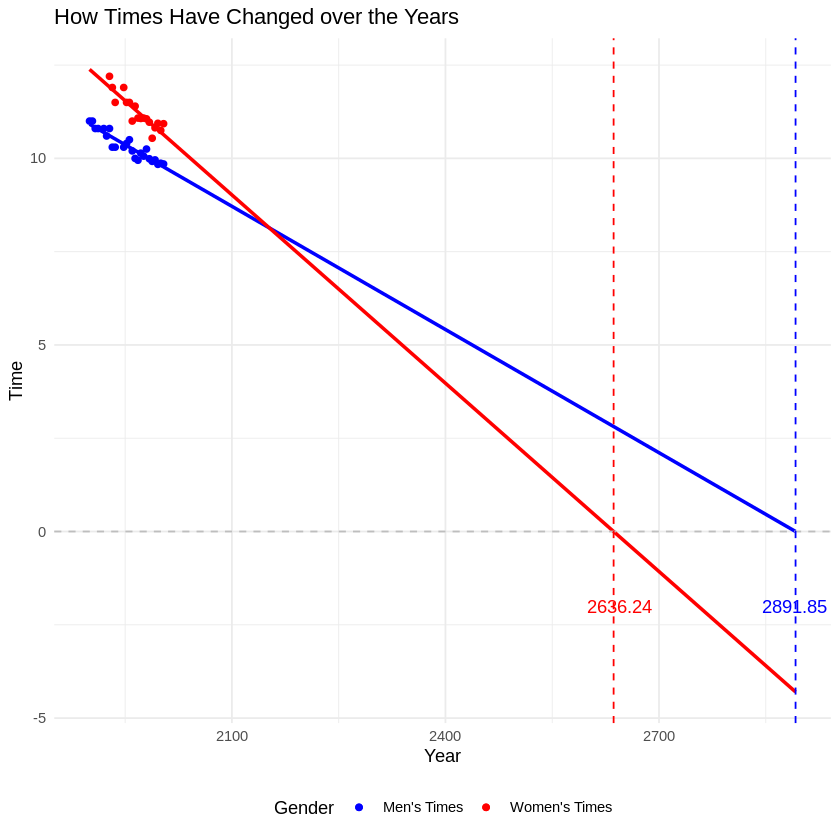

In [ ]:
library(ggplot2)

# Scatterplot with regression line to show the correlation
plot <- ggplot(times, aes(x = Year, y = Men.s.Times)) +
  geom_point(aes(color = "Men's Times")) +
  geom_smooth(method = "lm", se = FALSE, color = "blue", fullrange = TRUE) +
  geom_point(aes(y = Women.s.Times, color = "Women's Times")) +
  geom_smooth(aes(y = Women.s.Times), method = "lm", se = FALSE, color = "red", fullrange = TRUE) +
  labs(
    title = "How Times Have Changed over the Years",
    x = "Year",
    y = "Time",
    color = "Gender"
  ) +
  scale_color_manual(values = c("Men's Times" = "blue", "Women's Times" = "red")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  expand_limits(y = c(0, 12))

# Linear model for Men's Times
men_lm <- lm(Men.s.Times ~ Year, data = times)

# Linear model for Women's Times
women_lm <- lm(Women.s.Times ~ Year, data = times)

# Intersection year with y = 0 for Men's Times
intersection_year_men <- -coef(men_lm)[[1]] / coef(men_lm)[[2]]

# Intersection year with y = 0 for Women's Times
intersection_year_women <- -coef(women_lm)[[1]] / coef(women_lm)[[2]]

# Horizontal lines to the plot to indicate where y = 0 intersects the lines
plot +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray") +
  geom_vline(xintercept = intersection_year_men, linetype = "dashed", color = "blue") +
  geom_vline(xintercept = intersection_year_women, linetype = "dashed", color = "red") +
  annotate("text", x = intersection_year_men - 5, y = -2, label = paste("", round(intersection_year_men, 2)), color = "blue") +
  annotate("text", x = intersection_year_women + 5, y = -2, label = paste("", round(intersection_year_women, 2)), color = "red")


**Discussion 1**



**Prepare workspace by...**

1. Looking at previous projects for tips and inspiration
2. Do some of my own research and use online guides
3. Check in with Carrie or Sadie if needed help
4. Utilize my partner if help is needed
5. Schedule and plan for this project

**Discussion Question 2**

**Coding professional practice - sketch out your plan in pseudocode before implementing. This may also prompt you to identify some commands you may have to look up. Remember to Google, use ?command, and args().**

**Sketch out some pseudocode for the plan above. Compare and contrast approaches with your group members. What commands will you need to know in order to carry out your plan? Will this require any particular use of structures? What packages will you need to install to use these commands? Write a sketch of your code below in the pseudo code section.**


A huge component of this project is visualizing linear models and being able to predict certain values based on the foundation provided by our given data. After consulting and researching on Google, alongside looking at prior projects and DataCamp, I'm primarily focusing on using functions and commands such as "geom__", "lm", "coef", and the preinstalled package of ggplot. As a result of this usage, I've created three distinct graphs that help me accomplish my project goals.



**Discussion Question 3. How can you write a self-check into your script code?**

**Implement a self-check into your code. What result did you get? Same as Calling Bull? Different? Is the code working properly?**

A good way to self-check into my code is using conditional statements (e.g if) to check if certain conditions are executed when generating my code. For example:

In [ ]:
# Discussion Question 3 Example using basic math
number <- 15

if (number > 10) {
  print("The number is greater than 10.")
} else {
  print("The number is not greater than 10.")
}

[1] "The number is greater than 10."


**Discussion Question 4**

**What does it mean/what story does it tell? What did you learn?**

For my first task, I had to visualize the given data from the spreadsheet (times.csv). While I was cleaning the data, I found it essential to disregard null values because I had to present the data with historical-accuracy, rather than infer and essentially produce "BS" results. After writing the code and running it, it generates a linear model that shows how track times change over time---producing a line of best fit.


For my second task, I had to find out where the linear fit lines intersect---as in the Nature paper, it's projected to  intersect just before the 2156 Olympics, when the "winning women's 100-metre sprint time of 8.079 s will be faster than the men's at 8.098 s". After finding the linear regression coeffecients using calculations, therefore producing an intersection year of "2153", we can visually see the lines intersect and also see how our data supports the article's projection.

For my third task, I first inferred that women would reach a time of "zero seconds" first, which is virtually and humanly impossible. This inference was created based on the previous graph as it displayed how women are deemed to get faster in a shorter amount of time relative to men. Supporting  the reductio ad absurdum argument by finding out such an impossible feat amongst both egenders, I found that women would reach a 100 meter time of zero seconds around 2636, while men will reach this 100m time around 2892.